In [ ]:
# # BASICS
# from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# # # HELPER FUNCTIONS
# # # import src.my_resample as ms
import src.my_functions as mf

# # # METRICS
# # from sklearn.metrics import confusion_matrix
# # from sklearn.metrics import precision_score 
# # from sklearn.metrics import recall_score
# # from sklearn.metrics import accuracy_score
# # from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve

# # CLASSIFIERS
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # GRID SEARCHING
# from sklearn.model_selection import RandomizedSearchCV

# # WARNINGS
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
X_train, X_test, y_train, y_test, cols = mf.load_arrays(scale = True, classification = True)
df = pd.read_pickle('data/features.pkl')
master_df = pd.read_pickle('/Users/gandalf/Documents/coding/do_not_commit/capstone/master_df.pkl')

In [5]:
# all features in order 
for feature in list(df['features']): print(feature, end=', ')

created_day_of_year_receiver, len_about_receiver, first_message_day_of_year, created_day_of_year_sender, age_receiver, urgency_receiver, created_day_of_month_receiver, len_hobbies_receiver, minCost_receiver, has_location_receiver, created_day_of_month_sender, rent_range_sender, overlap_hobbies, yes_room_receiver, distance, maxCost_sender, age_dif, len_amenities_receiver, first_message_day_of_month, first_message_day_of_week, numRoommates_receiver, engagement_proxy_sender, gender_sender, has_birthdate_receiver, has_available_receiver, first_message_len, gender_receiver, len_amenities_sender, isClean_sender, has_password_receiver, has_linkedin_receiver, len_about_sender, yes_block_receiver, rent_range_receiver, maxCost_receiver, first_message_hour, td_creat_avail_receiver, has_about_receiver, engagement_proxy_receiver, created_day_of_week_receiver, minCost_sender, age_sender, urgency_sender, len_hobbies_sender, has_hometown_receiver, len_neighborhoods_receiver, overlap_rent, term_receive

# created_day_of_year_receiver

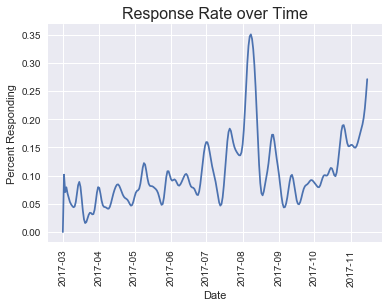

In [8]:
feature_name = 'created_day_of_year_receiver'
temp = master_df.groupby([feature_name,'response']).count().const.unstack().fillna(0)
temp.columns = ['no','yes']
temp['total'] = temp.no+temp.yes
temp['percent'] = temp.yes/temp.total

lst = mf.smooth(list(temp.percent), 10) 

dates = list(pd.date_range(pd.to_datetime("03/01/2017"), periods=len(lst)))

plt.plot(dates, lst)
plt.ylabel("Percent Responding")
plt.xlabel("Date")
plt.xticks(rotation='vertical')
plt.title("Response Rate over Time", fontsize=16)
plt.savefig("data/response_rate_"+feature_name+".png")
plt.show()

In [ ]:
# len_about_receiver

In [19]:
feature_name = 'len_about_receiver'
temp = master_df.groupby([feature_name,'response']).count().const.unstack().fillna(0)
temp.columns = ['no','yes']
temp['total'] = temp.no+temp.yes
temp['percent'] = temp.yes/temp.total

# lst = mf.smooth(list(temp.percent),20) 

# # dates = list(pd.date_range(pd.to_datetime("03/01/2017"), periods=len(lst)))

# plt.plot(range(0, 200), lst[0:200])
# plt.ylabel("Percent Responding")
# plt.xlabel("length")
# plt.xticks(rotation='vertical')
# plt.title("Length of Receiver's About Section", fontsize=16)
# plt.savefig("data/response_rate_"+feature_name+".png")
# plt.show()

In [28]:
temp = temp.reset_index()
temp.head()

,index,len_about_receiver,no,yes,total,percent
0,0,0.0,5246.0,320.0,5566.0,0.057492
1,1,1.0,18.0,1.0,19.0,0.052632
2,2,2.0,6.0,0.0,6.0,0.000000
3,3,3.0,6.0,0.0,6.0,0.000000
4,4,4.0,4.0,3.0,7.0,0.428571


In [32]:
temp['bin'] = temp.len_about_receiver.apply(lambda x: int(x/10))
temp.head()

,index,len_about_receiver,no,yes,total,percent,bin
0,0,0.0,5246.0,320.0,5566.0,0.057492,0
1,1,1.0,18.0,1.0,19.0,0.052632,0
2,2,2.0,6.0,0.0,6.0,0.000000,0
3,3,3.0,6.0,0.0,6.0,0.000000,0
4,4,4.0,4.0,3.0,7.0,0.428571,0


In [39]:
temp.groupby('bin').sum().percent

bin
0      0.538695
1      0.708824
2      1.012941
3      1.792857
4      0.930908
5      1.639757
6      2.490905
7      0.800198
8      3.325198
9      0.766667
10     0.919444
11     1.225140
12     1.506863
13     2.260317
14     2.351190
15     1.466667
16     1.995630
17     1.109524
18     3.605019
19     2.095608
20     1.451693
21     2.277056
22     1.291667
23     1.621918
24     1.788889
25     0.680868
26     1.332123
27     0.964286
28     1.595050
29     0.000000
         ...   
104    1.000000
105    1.000000
106    0.000000
107    0.777778
108    0.000000
109    0.000000
110    0.000000
111    0.600000
113    1.000000
116    1.000000
118    0.000000
119    0.000000
123    0.250000
125    1.000000
132    0.000000
135    0.000000
144    0.000000
145    0.000000
147    0.000000
156    1.000000
158    0.000000
160    0.500000
162    0.000000
172    0.000000
179    0.571429
207    0.000000
238    0.000000
253    1.000000
277    0.181818
350    1.000000
Name: percent, Lengt

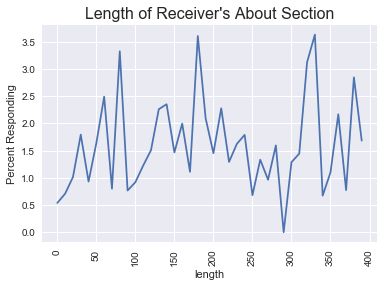

In [46]:
data_to_plot = temp.groupby('bin').sum().percent[0:40]
plt.plot(range(0, len(data_to_plot)*10, 10), data_to_plot)
plt.ylabel("Percent Responding")
plt.xlabel("length")
plt.xticks(rotation='vertical')
plt.title("Length of Receiver's About Section", fontsize=16)
plt.savefig("data/response_rate_"+feature_name+".png")
plt.show()